In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from nltk.corpus import stopwords
import keras.backend as K
from keras.models import Sequential
import string
import re

from tensorflow import keras
#import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import sequence
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input,Embedding,Dropout,Conv1D,MaxPooling1D,GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization,SimpleRNN,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
#import transformers
#import tokenizers
import os
#import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))
#print("TensorFlow Datasets version: ",tfds.__version__)

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

TensorFlow version: 2.14.0


"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

from textblob import TextBlob
from textblob import Word

In [22]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [23]:
print('length of data is', len(data))

length of data is 1600000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [25]:
data.target.value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [26]:
data['target'] = data['target'].replace(4,1)
data=data[['text','target']]
data.target.value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [31]:
data.head()

,text,target,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...,0,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",0,"@nationwideclass no, it's not behaving at all...."


In [28]:
nltk.download('stopwords')
tokenizer = ToktokTokenizer()

stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
data['cleaned_text'] = data['text']
data.head()

,text,target,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...,0,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",0,"@nationwideclass no, it's not behaving at all...."


In [15]:
def strip_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]', '', text)

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s

def apply_stemming_and_remove_stopwords(text):
    # Tokenize the text
    words = text.split()
    
    # Apply stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in words]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in stemmed_words if word.lower() not in stop_words]
    
    # Join the words back into a sentence
    processed_text = ' '.join(filtered_words)
    
    return processed_text


def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = text.lower()
    text = clean_text(text)
    text = apply_stemming_and_remove_stopwords(text)
    return text



data['cleaned_text'] = data['cleaned_text'].apply(denoise_text)
data.head()


,text,target,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,"- awww, that' bummer. shoulda got david carr t..."
1,is upset that he can't update his Facebook by ...,0,upset can't updat hi facebook text it... might...
2,@Kenichan I dived many times for the ball. Man...,0,dive mani time ball. manag save 50% rest go bound
3,my whole body feels itchy and like its on fire,0,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",0,"no, it' behav all. i'm mad. whi here? becaus c..."


In [10]:
from nltk.stem import SnowballStemmer

english_stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [11]:
def preprocess(content, stem=False):
    content = re.sub(regex, ' ', str(content).lower()).strip()
    tokens = []
    for token in content.split():
        if token not in english_stopwords:
            tokens.append(stemmer.stem(token))
        return " ".join(tokens)


In [18]:
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: preprocess(x))

In [30]:
data.head()

,text,target,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...,0,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",0,"@nationwideclass no, it's not behaving at all...."


In [20]:
data.tail(5)

,text,target,cleaned_text
1599995,Just woke up. Having no school is the best fee...,1,
1599996,TheWDB.com - Very cool to hear old Walt interv...,1,thewdb
1599997,Are you ready for your MoJo Makeover? Ask me f...,1,
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1,happi
1599999,happy #charitytuesday @theNSPCC @SparksCharity...,1,happi


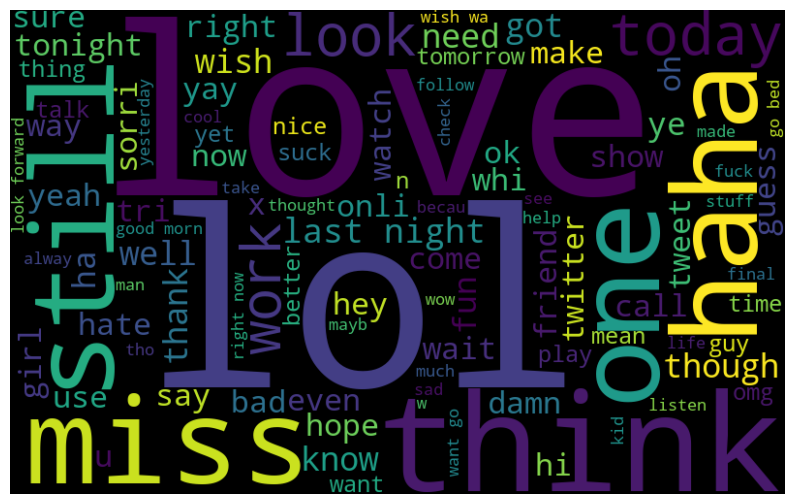

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#IMDB_df['cleaned_review'] = IMDB_df['review']
#IMDB_df.head()


wc = WordCloud(width=800, height=500, random_state=21, max_words=100, min_font_size=10).generate(' '.join(data['cleaned_text']))
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [18]:
from nltk.util import ngrams
import nltk
nltk.download('punkt')
from collections import Counter

def generate_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    return [' '.join(grams) for grams in n_grams]


cleaned_text = data['cleaned_text']
all_text = ' '.join(cleaned_text)

bigrams = generate_ngrams(all_text, 2)
trigrams = generate_ngrams(all_text, 3)

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# 20 most common bigrams and trigrams
top_bigrams = bigram_counts.most_common(20)
top_trigrams = trigram_counts.most_common(20)


def plot_ngrams(top_ngrams, n):
    labels, values = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.title(f'Top {n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.show()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


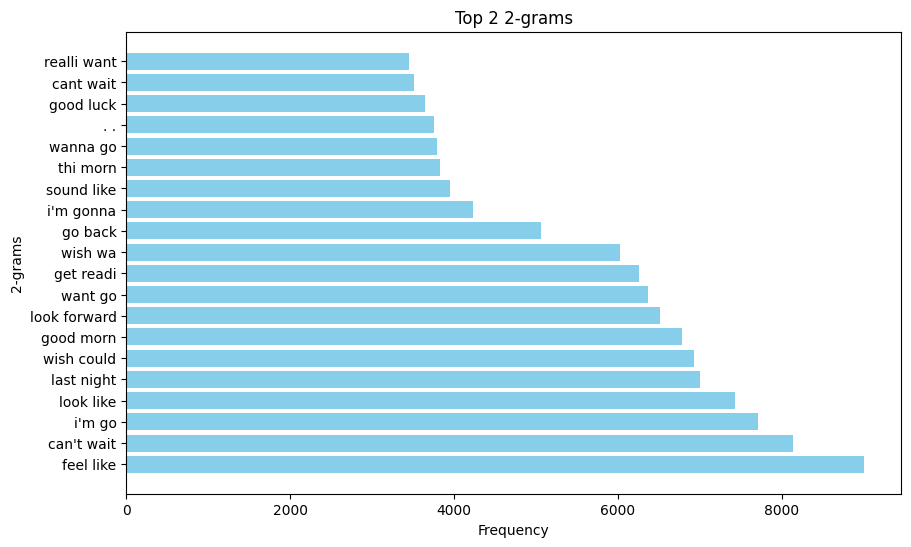

In [19]:
plot_ngrams(top_bigrams, 2)

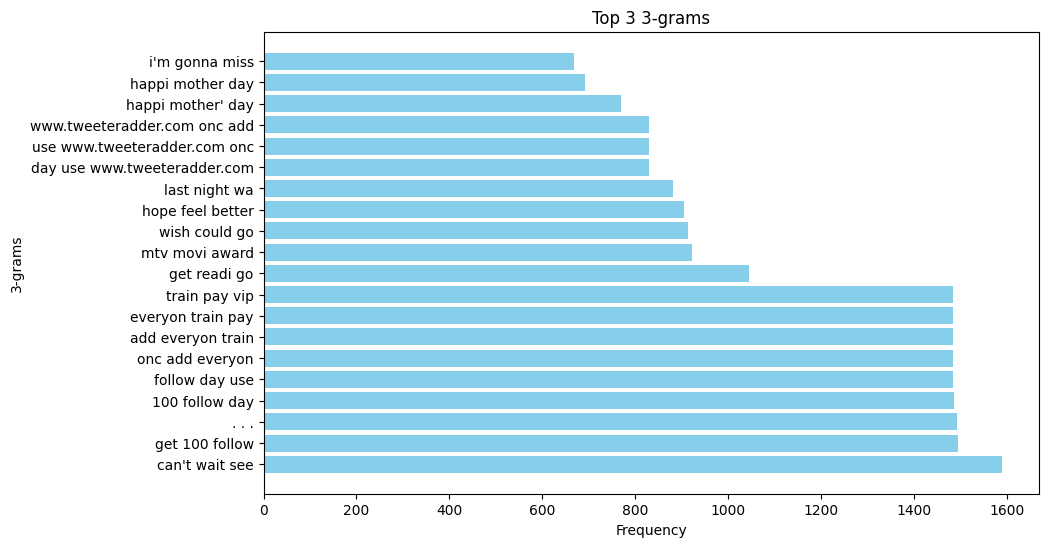

In [20]:
plot_ngrams(top_trigrams, 3)

In [21]:
#  Create X and y objects
X = data['cleaned_text']
y = data['target']

In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and labels (y) loaded

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Shufafle and batch the training dataset
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size=1024)

# Batch the testing dataset
test_dataset = test_dataset.batch(batch_size=1024)

# Example: Iterate through batches in training dataset
for batch in train_dataset.take(1):
    features, labels = batch
    print("Batch shape:", features.shape)
    print("Labels shape:", labels.shape)

# Example: Iterate through batches in testing dataset
for batch in test_dataset.take(1):
    features, labels = batch
    print("Batch shape:", features.shape)
    print("Labels shape:", labels.shape)


Batch shape: (1024,)
Labels shape: (1024,)
Batch shape: (1024,)
Labels shape: (1024,)


In [23]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [26]:
X_train.info()

<class 'pandas.core.series.Series'>
Index: 960000 entries, 127008 to 820352
Series name: cleaned_text
Non-Null Count   Dtype 
--------------   ----- 
960000 non-null  object
dtypes: object(1)
memory usage: 14.6+ MB
